 <h2><center>Importing All Libraries</center></h2>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.cm import rainbow

<h2><center>Reading Dataset</center></h2>

In [8]:
dataset = pd.read_csv('heart1.csv')
p= dataset.iloc[:,0:11].values
y= dataset.iloc[:, 11].values

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
1832,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
1833,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
1834,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
print("\n                                   Information of Data                     ")
dataset.info()


                                   Information of Data                     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1836 non-null   int64  
 1   Sex             1836 non-null   object 
 2   ChestPainType   1836 non-null   object 
 3   RestingBP       1836 non-null   int64  
 4   Cholesterol     1836 non-null   int64  
 5   FastingBS       1836 non-null   int64  
 6   RestingECG      1836 non-null   object 
 7   MaxHR           1836 non-null   int64  
 8   ExerciseAngina  1836 non-null   object 
 9   Oldpeak         1836 non-null   float64
 10  ST_Slope        1836 non-null   object 
 11  HeartDisease    1836 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 172.2+ KB


<h2><center>Representation of heartDisease according to male and female</center></h2>

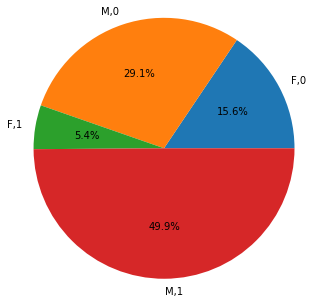

In [10]:
#pie chart
data_graph_sex = dataset.groupby(["HeartDisease","Sex"]).size()
plt.pie(data_graph_sex.values, labels = ["F,0","M,0","F,1","M,1"], autopct='%1.1f%%',
        radius = 1.5, textprops = {"fontsize" : 10}) 
plt.show()

<h2><center> Histogram </center></h2>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

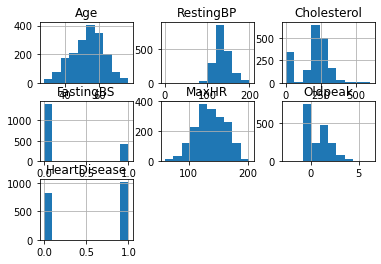

In [11]:
dataset.hist()

<h2><center>BarPlot for Target Class</center></h2>

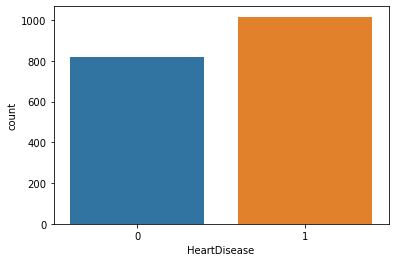

In [12]:
sns.countplot(x="HeartDisease", data=dataset)
plt.show()

<h2><center>Label Encoding</center></h2>

In [13]:
labelencoder = LabelEncoder()
p[:, 1] = labelencoder.fit_transform(p[:, 1])
p[:, 2] = labelencoder.fit_transform(p[:, 2])
p[:, 6] = labelencoder.fit_transform(p[:, 6])
p[:, 8] = labelencoder.fit_transform(p[:, 8])
p[:, 10] = labelencoder.fit_transform(p[:, 10])
print("##########After Label Encoding###########")
print(p)

##########After Label Encoding###########
[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


<h4><center>Frequency of male and female</center></h4>

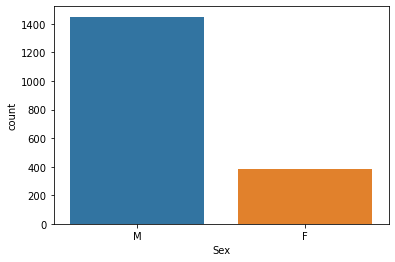

In [14]:
sns.countplot(x="Sex", data=dataset)
plt.show()

<h4><center>Resting BP</center></h4>

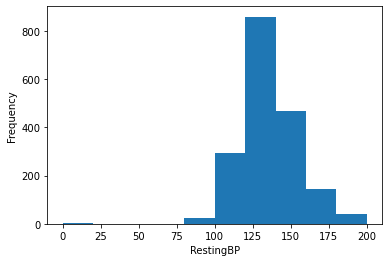

In [15]:
dataset["RestingBP"].plot.hist()
plt.xlabel('RestingBP')
plt.show()

<h4><center>Cholesterol</center></h4>

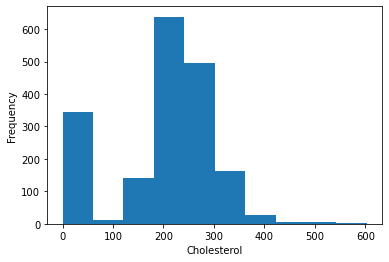

In [16]:
dataset["Cholesterol"].plot.hist()
plt.xlabel('Cholesterol')
plt.show()

<h2><center>Scaling of Data</center></h2>

In [20]:
X = p[:,0:11]
y= dataset.iloc[:, 11].values
 # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size = 0.25, random_state = 42) 
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2><center>K-Nearest Neighbors Classification Algorithm</center></h2>

In [22]:
#knn
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(weights='distance')
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy using KNN: ",accuracy_score(y_test, y_pred))
m_accuracy=[]
m_accuracy.append(accuracy_score(y_test, y_pred))
#new patient heart failure cholestrol =180,STslope=1
k=classifier.predict(sc.transform([[49,0,2,160,180,0,1,156,0,1.0,1]]))
print("New patient:",k)
if k[0]==0:
    print("no heart fail")
else:
    print("heart fail")

Accuracy using KNN:  0.9694989106753813
New patient: [1]
heart fail


<h2><center>Confusion Matrix </center></h2>

My Confusion Matrix  KNN: [[185   4]
 [ 10 260]]


<AxesSubplot:>

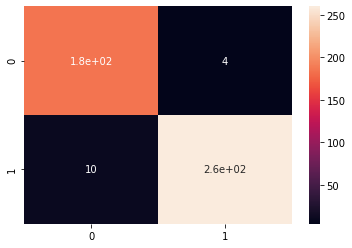

In [23]:
from sklearn.metrics import confusion_matrix
print("My Confusion Matrix  KNN:",confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

<h2><center>Support Vector Machine Classification Algorithm </center> </h2>

In [27]:
#######Linear SVM Classification:

from sklearn.svm import SVC

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))
    y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy using SVM: ",accuracy_score(y_test, y_pred))


Accuracy using SVM:  0.9694989106753813


<h2><center>Confusion Matrix</center> </h2>

My Confusion Matrix SVM : [[185   4]
 [ 10 260]]


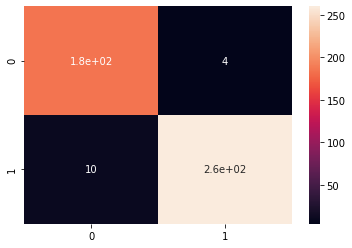

In [28]:
from sklearn.metrics import confusion_matrix
print("My Confusion Matrix SVM :",confusion_matrix(y_test, y_pred))
cf_mat=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_mat,annot=True)

m_accuracy.append(accuracy_score(y_test, y_pred))


 <h2><center>Support Vector Classifier scores for different kernels </center></h2> 

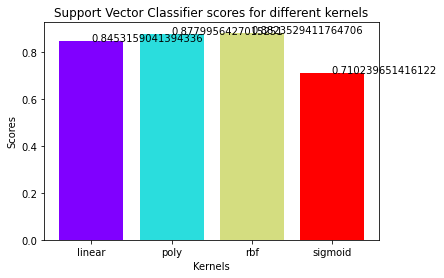

In [30]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)

for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()


<h2><center>Random Forest Classification Algorithm</center></h2>

In [42]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:" , accuracy_score(y_test, y_pred))
m_accuracy.append(accuracy_score(y_test, y_pred))


Accuracy: 0.9782135076252724


<h2><center>Decision Tree Classification Algorithm</center></h2>

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',
                                    random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy using decision tree:",accuracy_score(y_test, y_pred))
m_accuracy.append(accuracy_score(y_test, y_pred))

Accuracy using decision tree: 0.9694989106753813


<h2><center>Accuracy comparison</center></h2>

KNN    0.969499
SVM    0.969499
rf     0.978214
dt     0.969499
dtype: float64


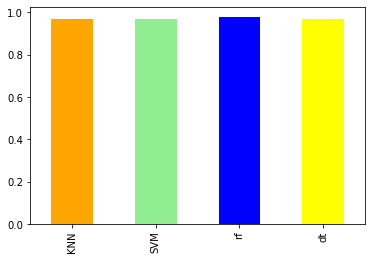

In [37]:
s=pd.Series(m_accuracy,index=['KNN','SVM','rf','dt'])
print(s)

s.plot(kind='bar',color=['orange', 'lightgreen', 'blue', 'yellow'])
plt.show()

<h2><center>Conclusion : Random Forest Classifier scored the best score of 97%.</center></h2>